# Version 2

### Numpy 4.4 (5 min)

Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

Text(0.5, 0, 'x')

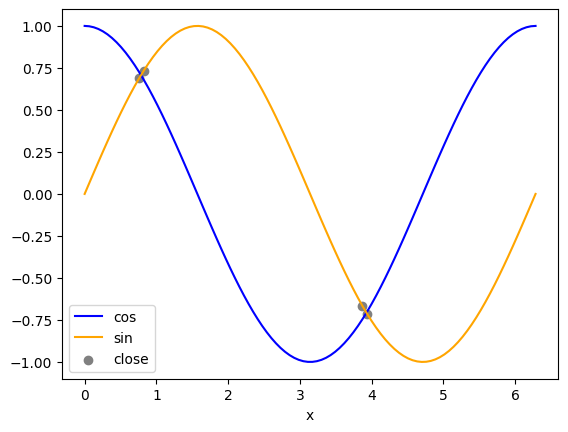

In [8]:
import numpy as np
import matplotlib.pyplot as plt
a = np.linspace(0, 2*np.pi, 100)
a_subset = a[::10]
a_reversed = a[::-1]
a_sin_cos = a[np.abs(np.sin(a) - np.cos(a)) <= 0.1]


plt.plot(a, np.cos(a), label= "cos", color = "blue")
plt.plot(a, np.sin(a), label= "sin", color = "orange")
plt.scatter(a_sin_cos, np.sin(a_sin_cos), label= "close", color = "grey")
plt.legend()
plt.xlabel("x")

### Bash 3.2

2.a Make a copy of the file `data.csv` removing the metadata and the commas between numbers; call it `data.txt`

2\.b How many even numbers are there?

2\.c Distinguish the entries on the basis of `sqrt(X^2 + Y^2 + Z^2)` is greater or smaller than `100*sqrt(3)/2`. Count the entries of each of the two groups 

2\.d Make `n` copies of data.txt (with `n` an input parameter of the script), where the i-th copy has all the numbers divided by i (with `1<=i<=n`).

```bash
# imput parameter for point 4
if [ -z $1 ]
then
    echo "this script requires as input the name of the file to be created"
    exit
else
    n=$1
    echo "imput is $n"
fi

# 2.a
mkdir ex2
cd ex2
cp ../data.csv ./data.csv
grep -v "^#" data.csv > data.txt #put rows that do not begin with #
sed -i "" 's/,//g' data.txt 

# 2.b
even_numbers=0
while IFS= read -r line; do
    for field in $line; do
        if  (( field % 2 == 0 )) ; then
            (( even_numbers++ ))
        fi
    done
done < data.txt
echo "even numbers are $even_numbers"

#2.c
# first three columns
counter_lt=0
counter_gt=0
max_sqrt=$(echo "100*sqrt(3/2)" |bc)
while IFS= read -r line; do
    x=$(echo "$line" | cut -f 1 -d " ")
    y=$(echo "$line" | cut -f 2 -d " ")
    z=$(echo "$line" | cut -f 3 -d " ")
    sqrt=$(echo "sqrt($x^2 + $y^2 + $z^2)" | bc)
    if [ $sqrt -lt $max_sqrt ]; then
        ((counter_lt++)); else
        ((counter_gt++))
    fi
done < data.txt
echo "entries with r<sqrt(3/2)*100 are $counter_lt, with r>sqrt(3/2)*100 are $counter_gt"

#2.d
for (( i=1; i<=n; i++ )); do
    while IFS= read -r line; do
        echo "$line" | awk  -v divisor="$i" '{for(j=1;j<=NF;j++) $j=sprintf("%.3f", $j/divisor)}1' >> "data_copy_$i".txt
        # -v divisor="$i" passes i as a variable to awk
        # awk '{}' is the basic syntax
        # NF is the number of fields
        # }1' ensures that the line is printed
        # >> creates the file when not existing and appends to it during successive iterations
    done < "data.txt"
done
```

### 8.1\. PCA on 3D dataset  (1h)

1. (done) Generate a dataset with $M = 3$ features and N ${\cal O}(1000)$ measurements. Specifically, with $N(\mu,\sigma)$ the normal distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 features $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
2. (done) Find the eigenvectors and eigenvalues of the covariance matrix of the dataset.
3. (done) Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result.
4. (done) What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
5. (done) Redefine the data in the basis yielded by the PCA procedure.
6. (done) Plot the data points in the original and the new coordinates as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


**Remeber**:

$$ X = \begin{bmatrix}...x_{1}...\\...x_{2}...\\...\\...x_{M}...\end{bmatrix} $$
is the data matrix, where each row contains one sample. If the mean is $<\vec{x}> = \vec{0}$, then 

$$ \Sigma = \frac{1}{M-1}\,X\cdot X^{T} = \frac{1}{M-1}\,X^T\cdot X$$
is the covariance matrix. It can be diagonalized as:

$$ \Lambda = Q^T\cdot \Sigma \cdot Q$$
where $Q = T_{B}^{\epsilon}$ is the matrix that contains the new basis vectors as columns. The data in the new basis is given by $X' = X\cdot Q$ and its covariance matrix is $\Lambda$. To perform PCA:

- pick the $P< N$ largest eigenvalues of $\Lambda$
- delete all the corresponding column vectors in $Q$, you get a matrix $\tilde{Q}$ which is $N \cdot P$
- do the transformation $\tilde{X} = X\cdot \tilde{Q}$, you get a vector of length $P$.

**Efficient computation using SVD**

For large datasets, the explicit computation of $\Sigma$ is expensive and can be avoided. Instead one should perform SVD on the data matrix $X$ directly, giving:

$$ X = U\cdot D \cdot  V^T$$

then it can be shown that this also defines an eigenvalue decomposition for $\Sigma$ given by:

$$ \Lambda = Q^T\cdot \Sigma \cdot Q \quad \text{with} \quad Q= V \quad \text{and} \quad\Lambda = \frac{1}{M-1}\,D^T\cdot D$$


**Sample variability**

By taking the first largest $P\leq N$ eigenvalues of $\Lambda$, the percentage of sample variability explained is:

$$\frac{\sum_{i=1}^{P}\, \lambda_i}{\sum_{j=1}^{N}\, \lambda_j}$$

(3, 3)
eigvals using eigval decomposition: 
 [ 2.51843280e+01 -3.68786065e-17  2.09284557e+00]
eigvals using SVD: 
 [2.51895108e+01 2.09363079e+00 1.53815654e-30] 


[ 2.51843280e+01 -3.68786065e-17  2.09284557e+00] 

 [[-0.12262895 -0.81649658  0.56417681]
 [-0.5683437  -0.40824829 -0.71436599]
 [-0.81360161  0.40824829  0.41398763]] 


after sorting: 

 [ 2.51843280e+01  2.09284557e+00 -3.68786065e-17] 

 [[-0.12262895  0.56417681 -0.81649658]
 [-0.5683437  -0.71436599 -0.40824829]
 [-0.81360161  0.41398763  0.40824829]] 


2 components explain(s) 1.0000000 of variance


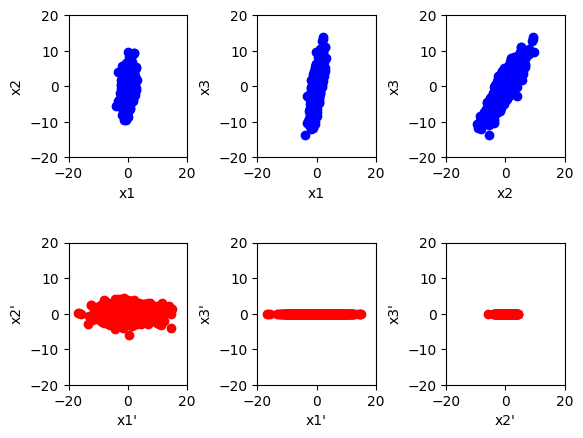

In [49]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

M = 3
N = 1000
x1 = norm.rvs(loc = 0, scale = 1, size = N)
x2 = x1 + norm.rvs(loc = 0, scale = 3, size = N)
x3 = 2*x1 + x2
X = np.vstack((x1, x2, x3)).T
#print(X.shape)

# eigval decomposition on cov
Sigma = np.cov(X.T, ddof = 1) # unbiased sample estimate
print(Sigma.shape)
eigval, Q = np.linalg.eig(Sigma)
print("eigvals using eigval decomposition: \n", np.real(eigval))

# SVD decomposition on X
U, diag_D, Vt = np.linalg.svd(X)
eigval = 1/(N-1) * diag_D**2
print("eigvals using SVD: \n",np.real(eigval), '\n\n')

# PCA to explain 99% of sample variability
Sigma = np.cov(X.T, ddof = 1) 
eigval, Q = np.linalg.eig(Sigma)
eigval = np.real(eigval)
print(eigval, '\n\n', Q, '\n\n')
sorted_idxs = np.argsort(eigval) # form smallest to largest
sorted_idxs = sorted_idxs[::-1] #reverse order
eigval = eigval[sorted_idxs]
Q = Q[:, sorted_idxs]
print("after sorting: \n\n",  eigval,'\n\n', Q, '\n\n')
p = 2
explained_variance = np.sum(eigval[0:p])/np.sum(eigval)
print(f"{p} components explain(s) {explained_variance:.7f} of variance")
Q_tilde = Q[:, 0:p].copy()
X_tilde = np.matmul(X, Q_tilde) # compressed data

# Plots
X_prime =  np.matmul(X, Q) # rotated data without compression
projections = [(0,1), (0,2), (1,2)]
fig, axs = plt.subplots(nrows = 2, ncols = 3)
plt.subplots_adjust(hspace = 0.6, wspace = 0.6)
for col in range(3):
    axs[0, col].scatter(X[:, projections[col][0]], X[:, projections[col][1]], color = 'blue')
    axs[1, col].scatter(X_prime[:, projections[col][0]], X_prime[:, projections[col][1]], color = 'red')
    #axis labels
    axs[0, col].set_xlabel(f"x{projections[col][0]+1}")
    axs[0, col].set_ylabel(f"x{projections[col][1]+1}")
    axs[1, col].set_xlabel(f"x{projections[col][0]+1}'")
    axs[1, col].set_ylabel(f"x{projections[col][1]+1}'")
    # axis limits
    axs[0, col].set_xlim((-20, +20))
    axs[0, col].set_ylim((-20, +20))
    axs[1, col].set_xlim((-20, +20))
    axs[1, col].set_ylim((-20, +20))
    

**Answer** Since the columns of Q have been sorted before doing the plots, the coordinates (v1', v2', v3') of the new rotated basis correspond to the directions of largest variability, sorted from the highest to the lowest. Indeed this is what the plots show, v1' being the direction along which there is the highest variability (-20 , +20), followed by x2' (-5, +5) and x3' (practically null variance).

Given the way the data is produced, this makes perfectly sense, because x3 was a deterministic linear function of x1 and x2: x3=x1+x2 defines a plane in 3D space, therefore in the direction perpendicular to that plane there is no variance at all. This is reflected in the presence of exactly one zero eigenvalue in the matrix $\Sigma$. v3 is ideed the perpendicular vector to that plane, whereas v1 and v2 are two ortogonal vectors spanning that plane.

### 9.3\.2D minimization of a six-hump camelback function (30 min)

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?

point: ((0.08984200502097253, -0.7126563990796422)), f= -1.031628453489877
point: ((1.7036065869930905, -0.7960837768734718)), f= -0.2154638243830509
point: ((1.607104468395825, 0.5686516886586722)), f= 2.1042503103117864
point: ((0.0, 0.0)), f= 0.0


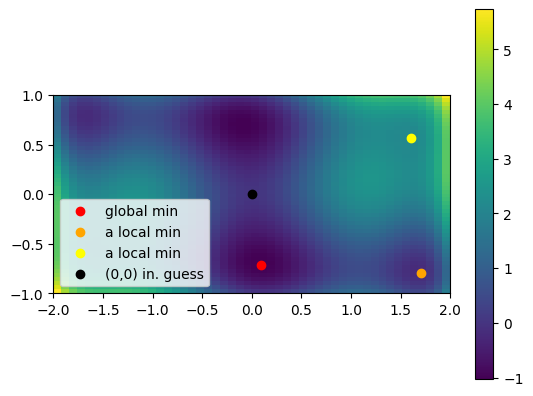

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

def f(x, y):
    return (4 - 2.1*x**2 + (1/3)* x**4)* x**2 + x*y + (4*y**2-4)*y**2

x, y = np.meshgrid(np.linspace(-2, +2, 50), np.linspace(-1, +1, 50))
z = f(x, y)
plt.imshow(z, origin = "lower", extent = (-2, +2, -1, +1))
plt.colorbar()

# global minima search
def f_vectorized(x):
    return (4 - 2.1*x[0]**2 + (1/3)* x[0]**4)* x[0]**2 + x[0]*x[1] + (4*x[1]**2-4)*x[1]**2
res = minimize(fun= f_vectorized, x0 = [0, -0.7], bounds = [[-2, +2], [-1, +1]])
plt.scatter(res.x[0], res.x[1], color = "red", label = "global min")
print(f"point: ({res.x[0], res.x[1]}), f= {f_vectorized(res.x)}")

res = minimize(fun= f_vectorized, x0 = [1.2, -0.7], bounds = [[-2, +2], [-1, +1]])
plt.scatter(res.x[0], res.x[1], color = "orange", label = "a local min")
print(f"point: ({res.x[0], res.x[1]}), f= {f_vectorized(res.x)}")

res = minimize(fun= f_vectorized, x0 = [1.8, 0.8], bounds = [[1.5, 2], [0.5, +1]])
plt.scatter(res.x[0], res.x[1], color = "yellow", label = "a local min")
plt.legend(loc = "lower left")
print(f"point: ({res.x[0], res.x[1]}), f= {f_vectorized(res.x)}")

res = minimize(fun= f_vectorized, x0 = [0, 0], bounds = [[-2, 2], [-1, +1]])
plt.scatter(res.x[0], res.x[1], color = "black", label = "(0,0) in. guess")
print(f"point: ({res.x[0], res.x[1]}), f= {f_vectorized(res.x)}")

plt.legend(loc = "lower left")

### 10.2\. **Rutherford Scattering** (10 min)

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

It is convenient to use atomic units:
$$ 4\pi \epsilon_0 = 1,\quad e = 1, \quad 1 Hartree = 27.211\, eV, \quad a_0 = 1$$

since $\tan{\frac{\pi}{4}}=1$, the condition on the impact parameter is 

$$ b \leq \frac{Z}{4}$$

In [60]:
import numpy as np
import numpy.random as npr
from scipy.stats import norm

N = 10**6
Z = 79
E = 7.7*10**6 / 27.211
b_max = 2*Z/E # in bohr radius units

# if the beam direction is fixed, only the perpendicular displacement of the alpha particle with respect to the target counts
# y axis|
#       |     (alpha) ---------------------> (target)
#       |________________________________________________ x axis
#
y_variates = norm.rvs(loc = 0, scale = 0.01, size = N)
probability_bounce_back = len(y_variates[np.abs(y_variates) <= b_max])/N
print(probability_bounce_back)


# if the beam can approach the target from any direction, the radial displacement should be computed instead
x_variates = norm.rvs(loc = 0, scale = 0.01, size = N)
y_variates = norm.rvs(loc = 0, scale = 0.01, size = N)
r_variates = np.sqrt(x_variates**2 + y_variates**2)
probability_bounce_back = len(r_variates[np.abs(r_variates) <= b_max])/N
print(probability_bounce_back)

0.044428
0.001553
